<a href="https://colab.research.google.com/github/tmaniy/Mileage-Prediction-Model-Machine-Learning-/blob/main/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **MILEAGE PREDICTION MODEL : REGRESSION ANALYSIS**

**DATA SOURCE**:The dataset was taken from StateLib library which is maintained at Carnegie Mellon University

**IMPORT LIBRARY**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

**IMPORT DATA**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**DATA PREPROCESSING**

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**DATA VISUALISATION**

In [ ]:
sns.pairplot(df, x_vars = ['mpg', 'displacement', 'horsepower', 'weight','acceleration'] , y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

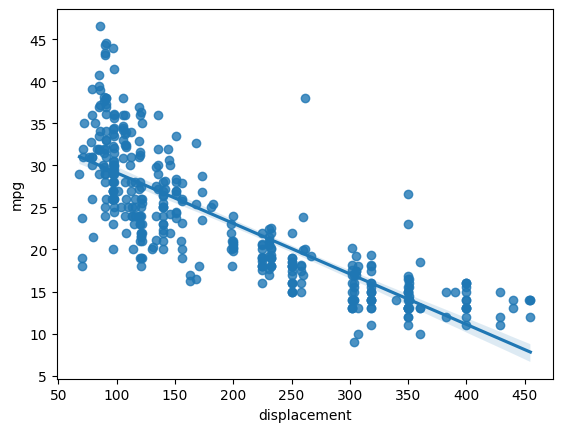

In [ ]:
sns.regplot(x='displacement' , y='mpg', data = df)

**DEFINE TARGET VARIABLE Y AND FEATURE X**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=df['mpg']

In [ ]:
y.shape

In [ ]:
x=df[['displacement', 'horsepower', 'weight','acceleration']]

In [ ]:
x.shape

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss= StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [ ]:
pd.DataFrame(x).describe()

,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327
std,104.644004,38.491160,849.402560,2.758864
min,68.000000,46.000000,1613.000000,8.000000
25%,105.000000,75.000000,2225.250000,13.775000
50%,151.000000,93.500000,2803.500000,15.500000
75%,275.750000,126.000000,3614.750000,17.025000
max,455.000000,230.000000,5140.000000,24.800000



**SPLIT DATA INTO TRAIN TEST**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7 , random_state=2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

**LINEAR REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.485738559737584

In [ ]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

**Mileage = 23.4-1.05(Displacement)-1.68(Horsepower)-4.10(weight)-0.115(Acceleration)+Error**

**PREDICT TEST DATA**

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

**MODEL ACCURACY**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

3.3286968643244106

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [ ]:
r2_score(y_test,y_pred)

0.7031250746717691

**POLYNOMIAL REGRESSION**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)

In [ ]:
X_train2 = poly.fit_transform(x_train)

In [ ]:
X_test2 = poly.fit_transform(x_test)

In [ ]:
lr.fit(X_train2,y_train)

LinearRegression()

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

In [ ]:
y_pred_poly = lr.predict(X_test2)

**MODEL ACCURACY**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

2.7887147720295977

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12074018342938687

In [ ]:
r2_score(y_test,y_pred_poly)

0.7461731314563803